In [1]:
# Download dataset

!gdown --id 1nzqavrTGHuRo-r5xwqgOknxrWswhdluV
!unzip /content/alzheimerdataset.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDe

In [2]:
# Import library yang diperlukan

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input, BatchNormalization
from keras import backend as K

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

In [3]:
train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)
validation = ImageDataGenerator(rescale=1./255)

Pre-Processing Data untuk Dataset

In [4]:
train = '/content/Alzheimer_s Dataset/train'

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224, 224),
    batch_size=32,
    subset='training',
    seed=500
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


Validation Data diambil sepertiga dari Tr

In [5]:
validation = '/content/Alzheimer_s Dataset/train'

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    train,
    validation_split=0.2,
    image_size=(224, 224),
    batch_size=32,
    subset='validation',
    seed=500
)

Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [6]:
test = '/content/Alzheimer_s Dataset/test'

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224, 224),
    batch_size=32,
    seed=500
)

Found 1279 files belonging to 4 classes.


In [7]:
class_names = ['MildDemented', 'ModerateDemented','NonDemented','VeryMildDemented']

train_data.class_names = class_names
validation_data.class_names = class_names
test_data.class_names = class_names

In [8]:
print(validation_data)

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


Contoh Data pada Train Dataset

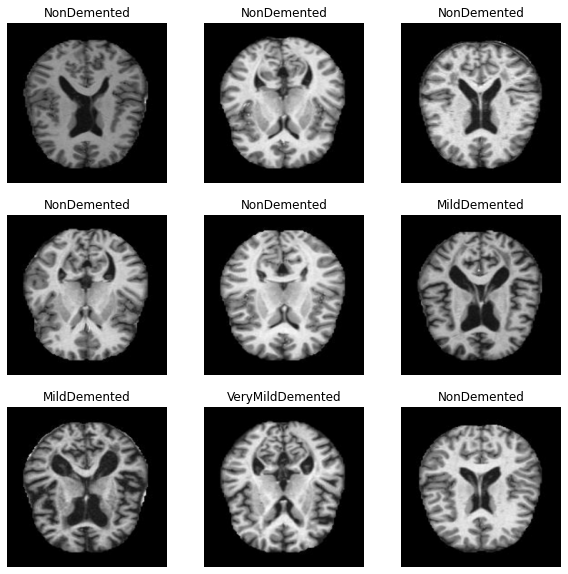

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[i]])
    plt.axis("off")
plt.savefig("sample.png")

Penambahan Layer

In [10]:
model=Sequential()

model.add(Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [11]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Model

In [12]:
model.compile(optimizer = tf.keras.optimizers.Adam(epsilon=1e-4), loss="sparse_categorical_crossentropy", metrics=['accuracy', f1_m,precision_m, recall_m])
history = model.fit(train_data, validation_data=validation_data, epochs=35)

Epoch 1/35
129/129 [==============================] - 305s 2s/step - loss: 1.4520 - accuracy: 0.3598 - f1_m: 2.5286 - precision_m: 232561.9062 - recall_m: 1.9079 - val_loss: 12.3137 - val_accuracy: 0.4824 - val_f1_m: 0.9293 - val_precision_m: 0.8691 - val_recall_m: 1.0000
Epoch 2/35
129/129 [==============================] - 302s 2s/step - loss: 1.1051 - accuracy: 0.4791 - f1_m: 2.7687 - precision_m: 155043.4219 - recall_m: 1.9748 - val_loss: 4.4169 - val_accuracy: 0.4912 - val_f1_m: 1.0388 - val_precision_m: 0.9941 - val_recall_m: 1.0917
Epoch 3/35
129/129 [==============================] - 300s 2s/step - loss: 1.0018 - accuracy: 0.5079 - f1_m: 2.7030 - precision_m: 4.3211 - recall_m: 1.9827 - val_loss: 1.2813 - val_accuracy: 0.3809 - val_f1_m: 2.8668 - val_precision_m: 4.2487 - val_recall_m: 2.1911
Epoch 4/35
129/129 [==============================] - 301s 2s/step - loss: 0.9634 - accuracy: 0.5116 - f1_m: 2.7667 - precision_m: 4.3818 - recall_m: 2.0376 - val_loss: 1.8644 - val_accura

Akurasi Model pada Data Test

In [13]:
model.evaluate(test_data)

40/40 [==============================] - 25s 610ms/step - loss: 3.2149 - accuracy: 0.3385 - f1_m: 1.4685 - precision_m: 1.4810 - recall_m: 1.4678


[3.2148830890655518,
 0.3385457396507263,
 1.46851646900177,
 1.4810459613800049,
 1.467817783355713]

Hasil dari Model yang dibentuk

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("train_vs_val_loss.png")
plt.show()

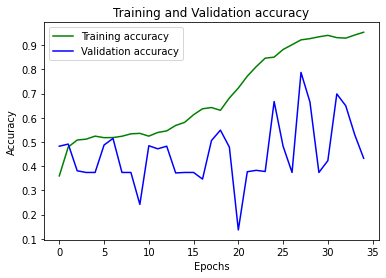

In [15]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'g', label='Training accuracy')
plt.plot(accuracy_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("train_vs_val_acc.png")
plt.show()

Hasil pada Validation Dataset

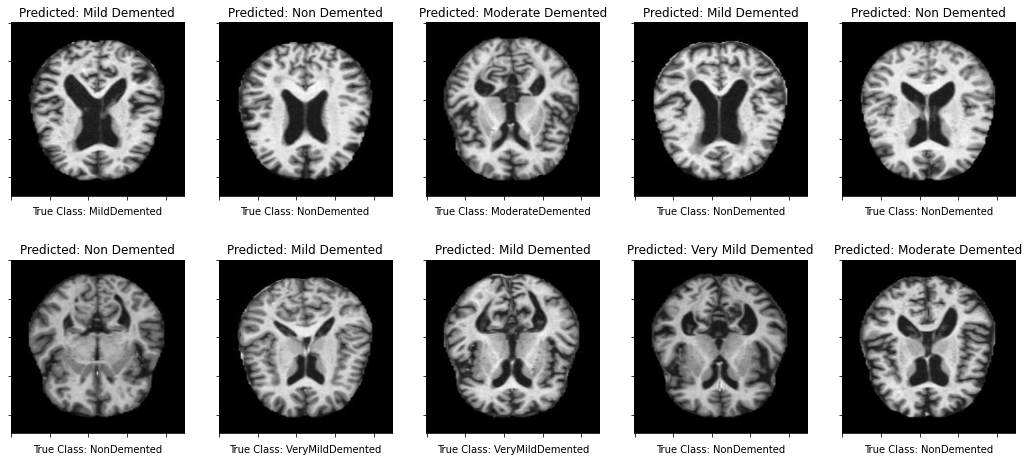

In [16]:
class_names={0:"Mild Demented", 1:"Moderate Demented", 2:"Non Demented", 3:"Very Mild Demented"}

plt.figure(figsize=(18,8))
for images, labels in validation_data.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i]/255)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))    
        plt.title("Predicted: {}".format(class_names[p]))
        plt.xlabel("True Class: {}".format(validation_data.class_names[labels[i]]))  

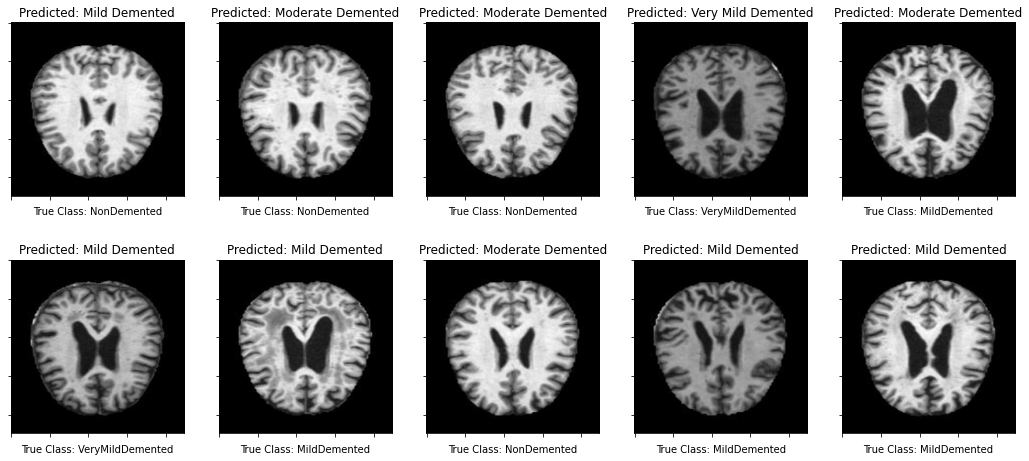

In [17]:
plt.figure(figsize=(18,8))
for images, labels in test_data.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i]/255)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        x = image.img_to_array(images[i])
        x = np.expand_dims(x, axis=0)
        p=np.argmax(model.predict(x))    
        plt.title("Predicted: {}".format(class_names[p]))
        plt.xlabel("True Class: {}".format(test_data.class_names[labels[i]]))  